In [1]:
#PART 1

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\Diya\\Downloads\\Social_Network_Ads.csv")

In [4]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = df.iloc[:, [ 1, 2, 3]].values 

In [6]:
Y = df.iloc[:, 4].values 

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [8]:
gender_mapping = {"Male": 0, "Female": 1}
X_train[:, 0] = np.vectorize(gender_mapping.get)(X_train[:, 0])
X_test[:, 0] = np.vectorize(gender_mapping.get)(X_test[:, 0])
Y_train = Y_train.astype(np.float64)
Y_test = Y_test.astype(np.float64)

In [9]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (280, 3)
Shape of Y_train :  (280,)
Shape of X_test :  (120, 3)
Shape of Y_test :  (120,)


In [10]:
X_train= X_train.astype(np.float64)
X_test= X_test.astype(np.float64)
Y_train= Y_train.astype(np.float64)
Y_test= Y_test.astype(np.float64)

In [11]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [12]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
    return theta

In [13]:
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

In [14]:
theta = np.zeros(X_train_bias.shape[1])

In [15]:
alpha = 0.01
iterations = 1000
theta = gradient_descent(X_train_bias, Y_train, theta, alpha, iterations)

C:\Users\Diya\AppData\Local\Temp\ipykernel_26984\3886325312.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
def evaluate_model(X_train, X_test, Y_train, Y_test):
    models = {
        "Raw Data": LogisticRegression(random_state=42),
        "Normalization": LogisticRegression(random_state=42),
        "Standardization": LogisticRegression(random_state=42),
    }
    scalers = {
        "Raw Data": None,
        "Normalization": MinMaxScaler(),
        "Standardization": StandardScaler(),
    }
    
    for key in models:
        scaler = scalers[key]
        X_train_scaled = X_train if scaler is None else scaler.fit_transform(X_train)
        X_test_scaled = X_test if scaler is None else scaler.transform(X_test)
        
        # Logistic Regression from scratch
        x_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
        h_scratch = sigmoid(np.dot(x_test_bias, theta))
        y_pred_scratch = np.round(h_scratch)
        acc = accuracy_score(Y_test, y_pred_scratch)
        
        # Logistic Regression using sklearn
        model = models[key]
        model.fit(X_train_scaled, Y_train)
        y_pred_sklearn = model.predict(X_test_scaled)
        acc_sklearn = accuracy_score(Y_test, y_pred_sklearn)

        print(f"{key} Accuracy (from scratch): {acc}")
        print(f"{key} Accuracy (sklearn): {acc_sklearn}")
        print( y_pred_scratch)
        print( y_pred_sklearn)
        print()

In [18]:
evaluate_model(X_train, X_test, Y_train, Y_test)

Raw Data Accuracy (from scratch): 0.6083333333333333
Raw Data Accuracy (sklearn): 0.6083333333333333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Normalization Accuracy (from scratch): 0.6083333333333333
Normalization Accuracy (sklearn): 0.8416666666666667
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\Diya\AppData\Local\Temp\ipykernel_26984\3886325312.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [19]:
#For all three cases, sklearn gives the most accurate predictions

In [20]:
#PART 2

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt

In [22]:
df = pd.read_csv("C:\\Users\\Diya\\Downloads\\Iris.csv")

In [23]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df= df.iloc[:,1:]

In [25]:
species = list(set(df['Species']))

In [26]:
S1= df[df['Species']==species[0]]
S2= df[df['Species']==species[1]]
S3= df[df['Species']==species[2]]

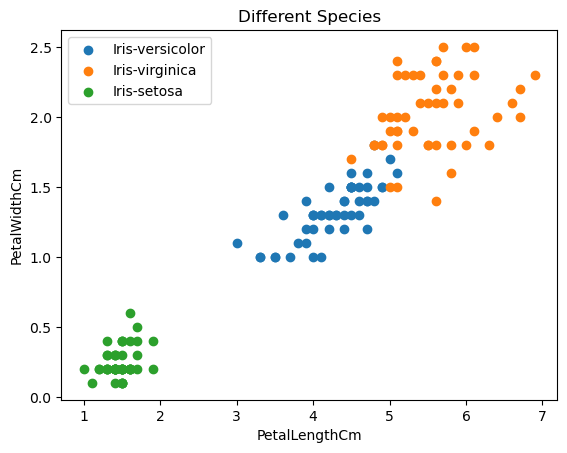

In [27]:
plt.scatter(S1['PetalLengthCm'],S1['PetalWidthCm'], label=species[0])
plt.scatter(S2['PetalLengthCm'],S2['PetalWidthCm'], label=species[1])
plt.scatter(S3['PetalLengthCm'],S3['PetalWidthCm'], label=species[2])
plt.title('Different Species')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

In [28]:
X = df.iloc[:, :-1].values 
Y = df.iloc[:, -1].values 

In [29]:
import random
random_state_value = random.randint(1, 1000)
print(random_state_value)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state_value)

286


In [30]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (105, 4)
Shape of Y_train :  (105,)
Shape of X_test :  (45, 4)
Shape of Y_test :  (45,)


In [31]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [32]:
def euclidean_distance(x_train, x_test):
    dist = 0
    for i in range(len(x_test)):
        dist += (x_test[i] - x_train[i]) ** 2
    return sqrt(dist)

In [33]:
def k_nearest_neighbors(X_train, Y_train, X_test, k):
    dist= [euclidean_distance(x, X_test) for x in X_train]
    k_nearest_indices = np.argsort(dist)[:k]
    labels = [Y_train[i] for i in k_nearest_indices]
    label_counts = {}
    for label in set(labels):
        label_counts[label] = labels.count(label)

    y_pred = max(label_counts, key=label_counts.get)
    return y_pred

In [34]:
def predictor(X_train, y_train, X_test, k):
    predictions = [k_nearest_neighbors(X_train, y_train, xtest, k) for xtest in X_test]
    return predictions

In [35]:
def accuracy(y_test, y_pred):
    correct=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            correct+=1
    accuracy= correct/len(y_test)
    return accuracy

In [36]:
Y_test_2= Y_test.tolist()

In [37]:
#from scratch
k_values = range(1, 22)
acc= []
for k in k_values:
    y_pred = predictor(X_train, Y_train, X_test, k)
    acc.append(accuracy(Y_test_2, y_pred))

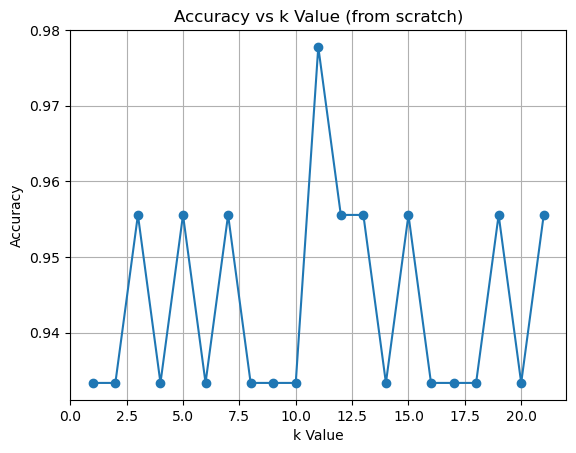

In [38]:
#from scratch
plt.plot(k_values, acc, marker='o')
plt.title('Accuracy vs k Value (from scratch)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [39]:
#As we can see, accuracy reaches a maximum value as k increases and then decreases further

In [40]:
#Optimal value for this case: 11

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [42]:
#using sklearn
acc_sklearn = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    y_pred_2 = knn_model.predict(X_test)
    acc_sklearn.append(accuracy_score(Y_test, y_pred_2))

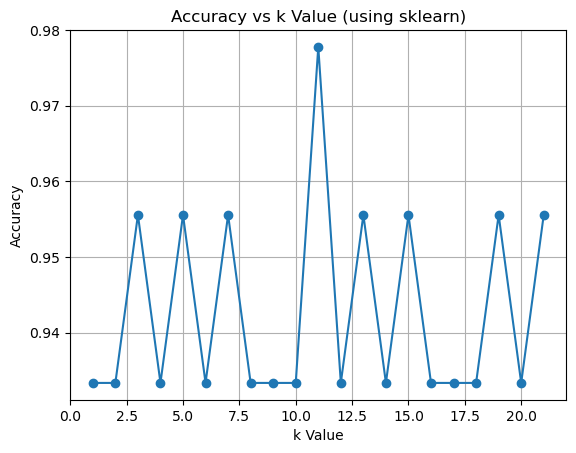

In [43]:
#using sklearn
plt.plot(k_values, acc_sklearn, marker='o')
plt.title('Accuracy vs k Value (using sklearn)')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()